In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits


In [5]:
df = pd.read_csv("./prices.csv")

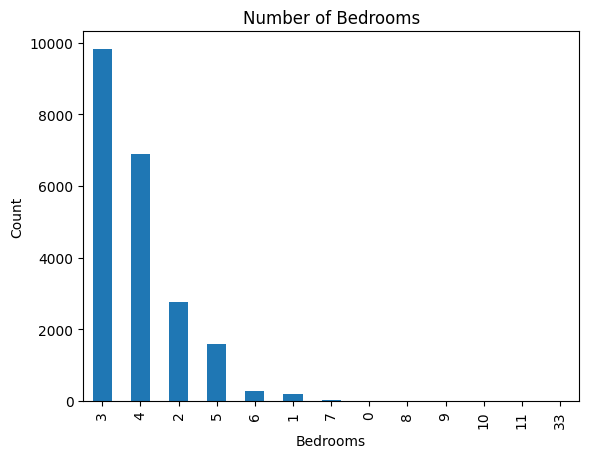

In [8]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

<Figure size 1000x1000 with 0 Axes>

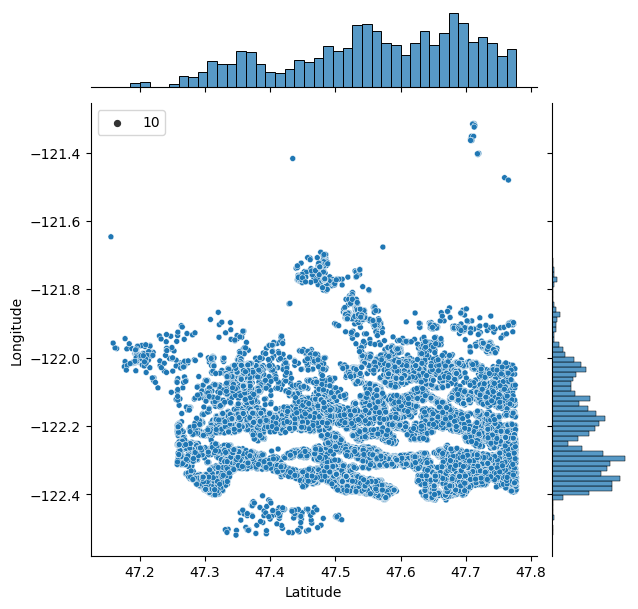

In [10]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

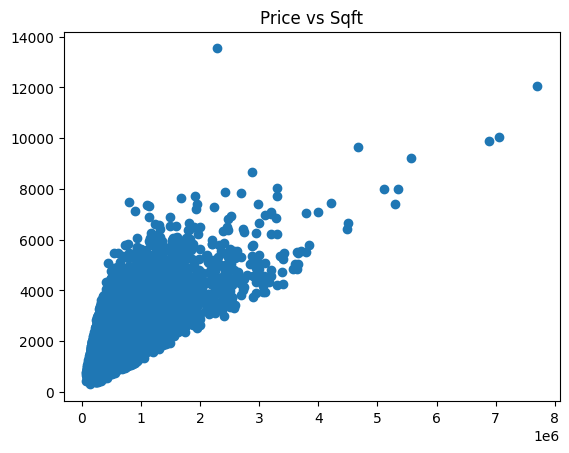

In [12]:
plt.scatter(df.price,df.sqft_living)
plt.title("Price vs Sqft")
plt.show()

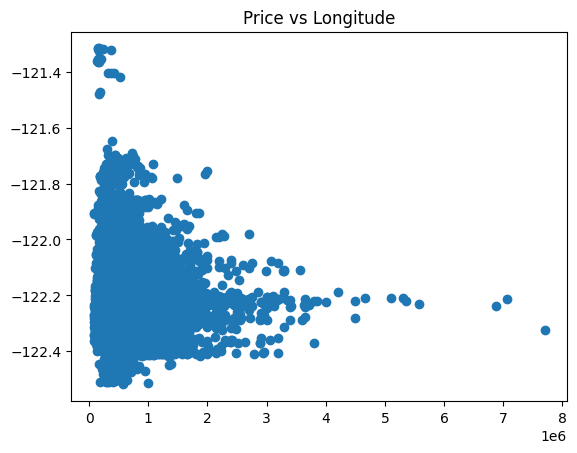

In [13]:
plt.scatter(df.price, df.long)
plt.title("Price vs Longitude")
plt.show()

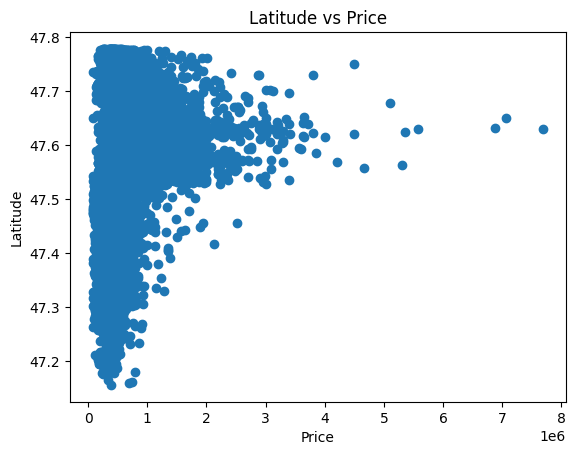

In [15]:
plt.scatter(df.price, df.lat)
plt.title("Price vs Latitude")
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.show()

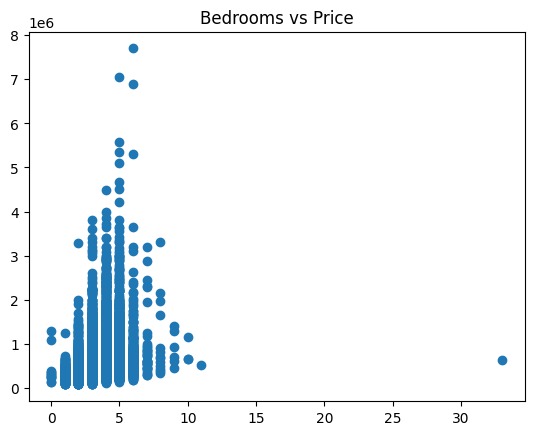

In [18]:
plt.scatter(df.bedrooms, df.price)
plt.title("Bedrooms vs Price")
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [28]:
labels = df['price']
conv_dates = [1 if value == 2014 else 0 for value in df.date]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'], axis=1)

In [29]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10,random_state=2)
print(x_test)

       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
6638      0         4       2.25         2410      4250     1.5           0   
7366      0         3       1.50         2170     16600     1.0           1   
3158      0         2       1.00         1450      6380     1.0           0   
9117      0         5       3.25         4500      9648     2.0           0   
3392      0         2       1.00          860      6000     1.0           0   
...     ...       ...        ...          ...       ...     ...         ...   
3823      0         4       2.00         2610     14321     1.5           0   
3268      0         4       1.75         2360     11300     1.0           0   
19051     0         3       1.00         1040      9514     1.0           0   
1486      0         5       2.75         2000      5885     1.0           0   
10955     0         3       2.50         1920      3867     2.0           0   

       view  condition  grade  sqft_above  sqft_bas

In [33]:
reg.fit(x_train, y_train)

LinearRegression()

In [34]:
reg.score(x_test, y_test)

0.7320342760357343

In [38]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate= 0.1, loss='squared_error')

In [39]:
clf.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [40]:
clf.score(x_test, y_test)

0.9192528879764311

In [51]:
new_df =  pd.read_csv('./new.csv')
new = new_df.drop(["id", "price"], axis=1)
predict = clf.predict(new)
print(predict)

[628994.95712355 830175.84463454]
